# Calculating Returns and Correlation Analysis

> Using the exported CSV file from task 1(stock news) and task 2(stock price), the analysis focus on finding the correlation between headline sentiments and returns of stocks.

In [2]:
# install empyrical for return calculation
pip install empyrical  

Note: you may need to restart the kernel to use updated packages.


In [3]:
# import libraries for the analysis
import pandas as pd
import empyrical as ep
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import pearsonr, spearmanr


import warnings
warnings.filterwarnings('ignore')

In [4]:
# loading the CSV files
stock_news = pd.read_csv('stock_news')
stock_price = pd.read_csv('stock_price')

In [5]:
# looking into the dataframes
print(f"The shape of stock news: {stock_news.shape}")
print(f"The shape of stock price: {stock_price.shape}")

The shape of stock news: (4402, 17)
The shape of stock price: (45428, 17)


In [7]:
# looking into the dataframes
stock_news.info()
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45428 entries, 0 to 45427
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          45428 non-null  object 
 1   Open          45428 non-null  float64
 2   High          45428 non-null  float64
 3   Low           45428 non-null  float64
 4   Close         45428 non-null  float64
 5   Adj Close     45428 non-null  float64
 6   Volume        45428 non-null  int64  
 7   Dividends     45428 non-null  float64
 8   Stock Splits  45428 non-null  float64
 9   stock         45428 non-null  object 
 10  SMA_20        45295 non-null  float64
 11  EMA_20        45295 non-null  float64
 12  RSI_14        45330 non-null  float64
 13  MACD          45197 non-null  float64
 14  MACD_Signal   45197 non-null  float64
 15  MACD_Hist     45197 non-null  float64
 16  OBV           45428 non-null  float64
dtypes: float64(14), int64(1), object(2)
memory usage: 5.9+ MB


## Daily Stock Returns

In [8]:
# rename Date to date not to cause error when merging the file
stock_price.rename(columns = {"Date":"date"},inplace = True)
stock_news['stock'] = stock_news['stock'].str.lower()

# merge the two dataframe
merged_df = pd.merge(stock_news, stock_price, on=['date','stock'])

In [9]:
# looking into the merged dataframe
print(f"The shape of the merged dataframe: {merged_df.shape}\n")
merged_df.info()

The shape of the merged dataframe: (4286, 32)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4286 entries, 0 to 4285
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   headline            4286 non-null   object 
 1   url                 4286 non-null   object 
 2   publisher           4286 non-null   object 
 3   date                4286 non-null   object 
 4   stock               4286 non-null   object 
 5   headline_length     4286 non-null   int64  
 6   publisher_domain    4286 non-null   bool   
 7   date_time           4286 non-null   object 
 8   time                4286 non-null   object 
 9   day                 4286 non-null   int64  
 10  month               4286 non-null   int64  
 11  year                4286 non-null   int64  
 12  month_name          4286 non-null   object 
 13  day_name            4286 non-null   object 
 14  sentiment           4286 non-null   float64
 15  sentimen

In [10]:
# looking into the merged dataframe
merged_df.head()

,headline,url,publisher,date,stock,headline_length,publisher_domain,date_time,time,day,...,Volume,Dividends,Stock Splits,SMA_20,EMA_20,RSI_14,MACD,MACD_Signal,MACD_Hist,OBV
0,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10,aapl,69,False,2020-06-10 11:33:26,11:33:26,10,...,166651600,0.0,0.0,78.446394,78.677706,80.377489,2.945628,2.505777,0.439851,1.575573e+11
1,10 Biggest Price Target Changes For Wednesday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-06-10,aapl,45,False,2020-06-10 08:14:08,08:14:08,10,...,166651600,0.0,0.0,78.446394,78.677706,80.377489,2.945628,2.505777,0.439851,1.575573e+11
2,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10,aapl,87,False,2020-06-10 07:53:47,07:53:47,10,...,166651600,0.0,0.0,78.446394,78.677706,80.377489,2.945628,2.505777,0.439851,1.575573e+11
3,"Deutsche Bank Maintains Buy on Apple, Raises P...",https://www.benzinga.com/news/20/06/16219873/d...,Benzinga Newsdesk,2020-06-10,aapl,65,False,2020-06-10 07:19:25,07:19:25,10,...,166651600,0.0,0.0,78.446394,78.677706,80.377489,2.945628,2.505777,0.439851,1.575573e+11
4,Apple To Let Users Trade In Their Mac Computer...,https://www.benzinga.com/news/20/06/16218697/a...,Neer Varshney,2020-06-10,aapl,87,False,2020-06-10 06:27:11,06:27:11,10,...,166651600,0.0,0.0,78.446394,78.677706,80.377489,2.945628,2.505777,0.439851,1.575573e+11


In [13]:
# the daily return of each companies
merged_df['daily_return'] = merged_df.groupby('stock')['Adj Close'].apply(ep.simple_returns).reset_index(drop=True) * 100
merged_df['date'] = pd.to_datetime(merged_df['date'])   # checking date to datetime 

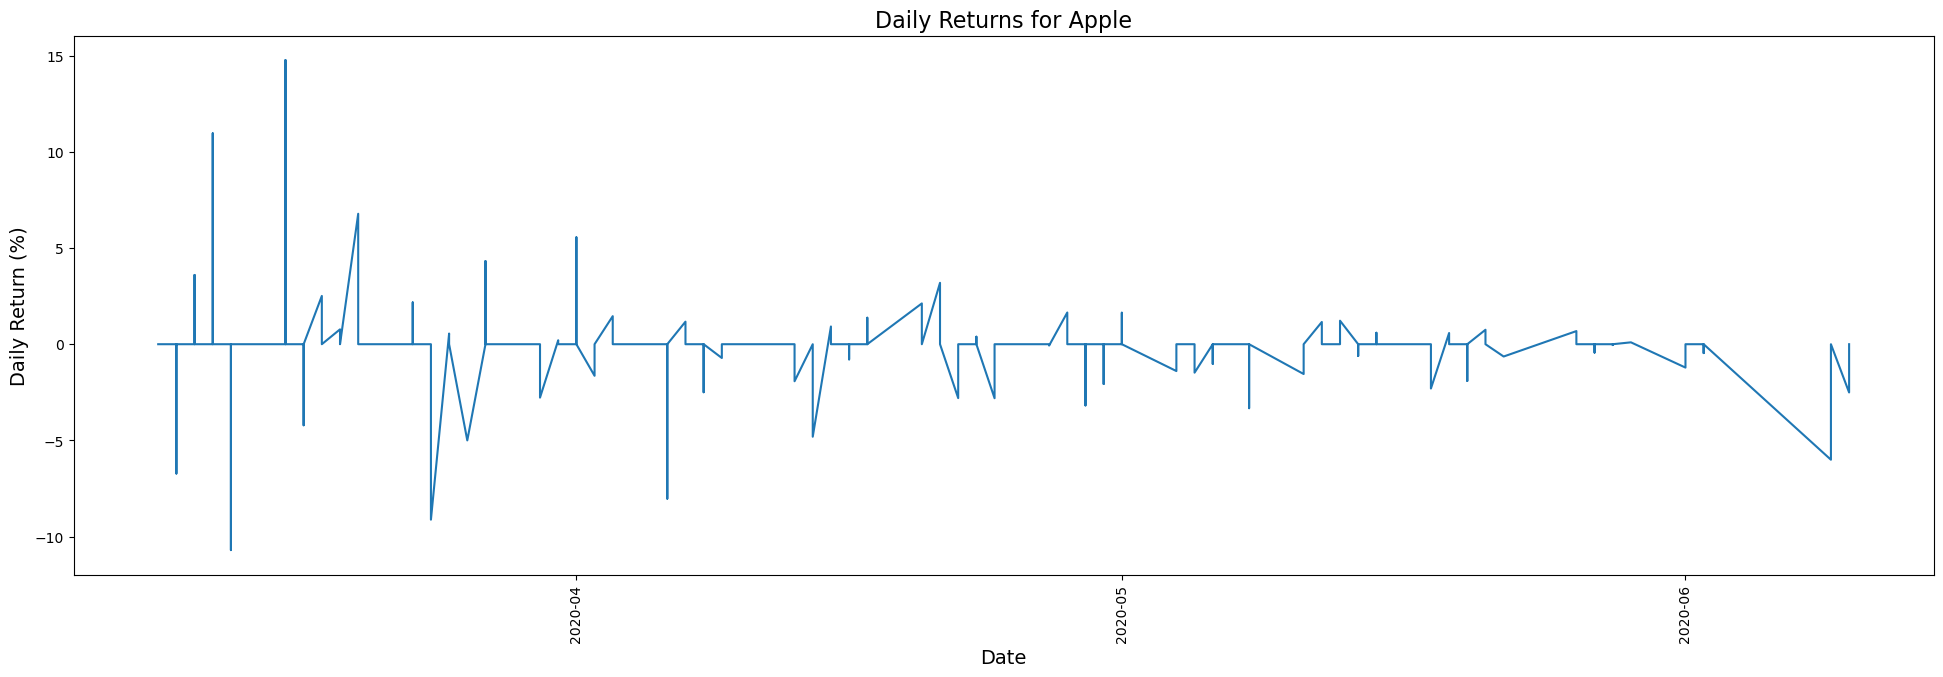

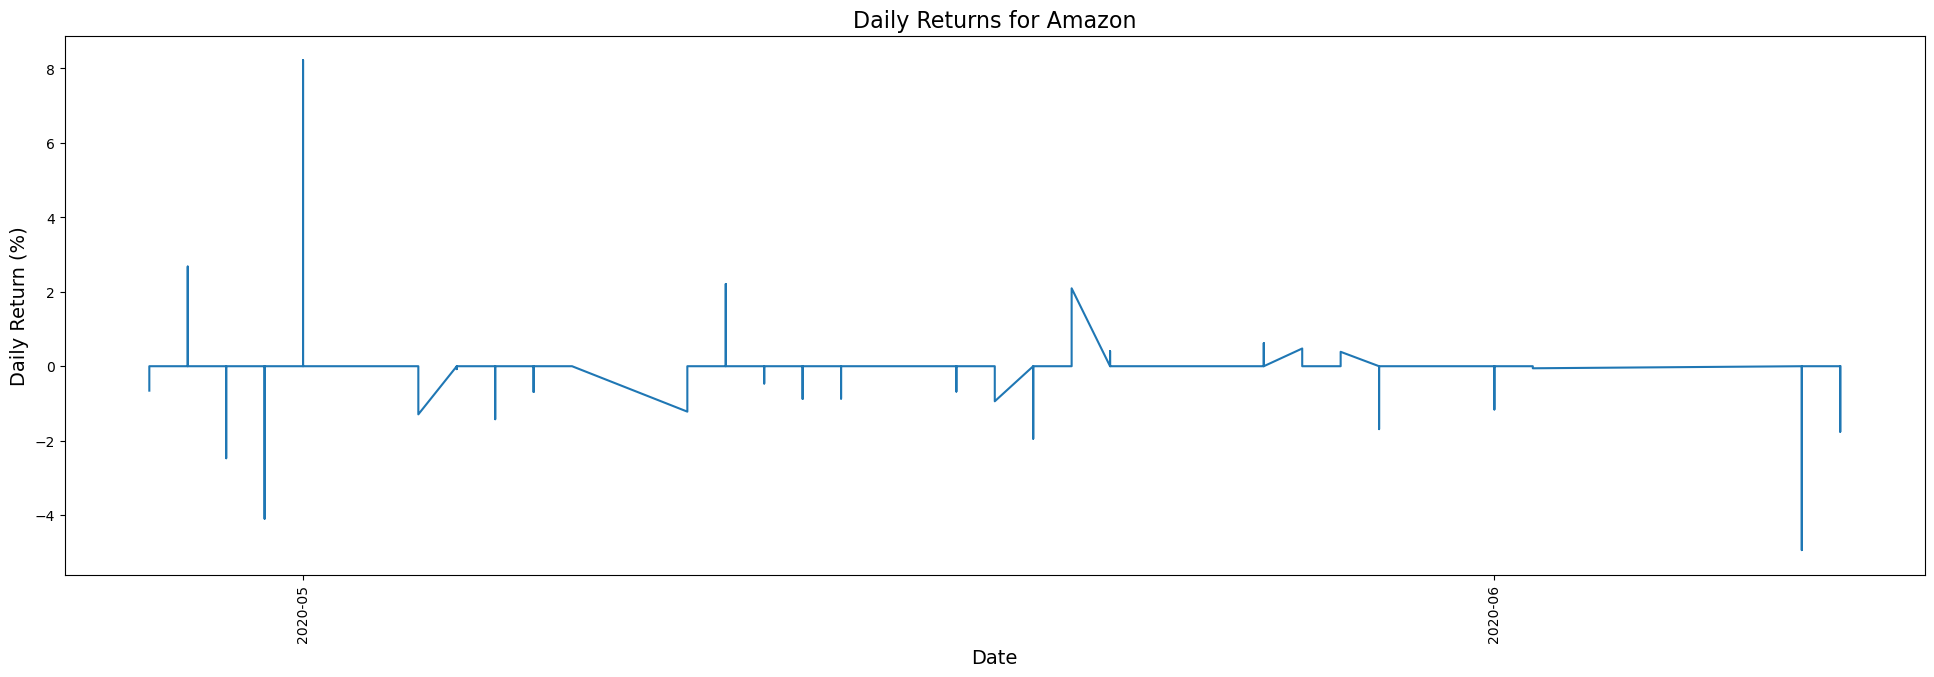

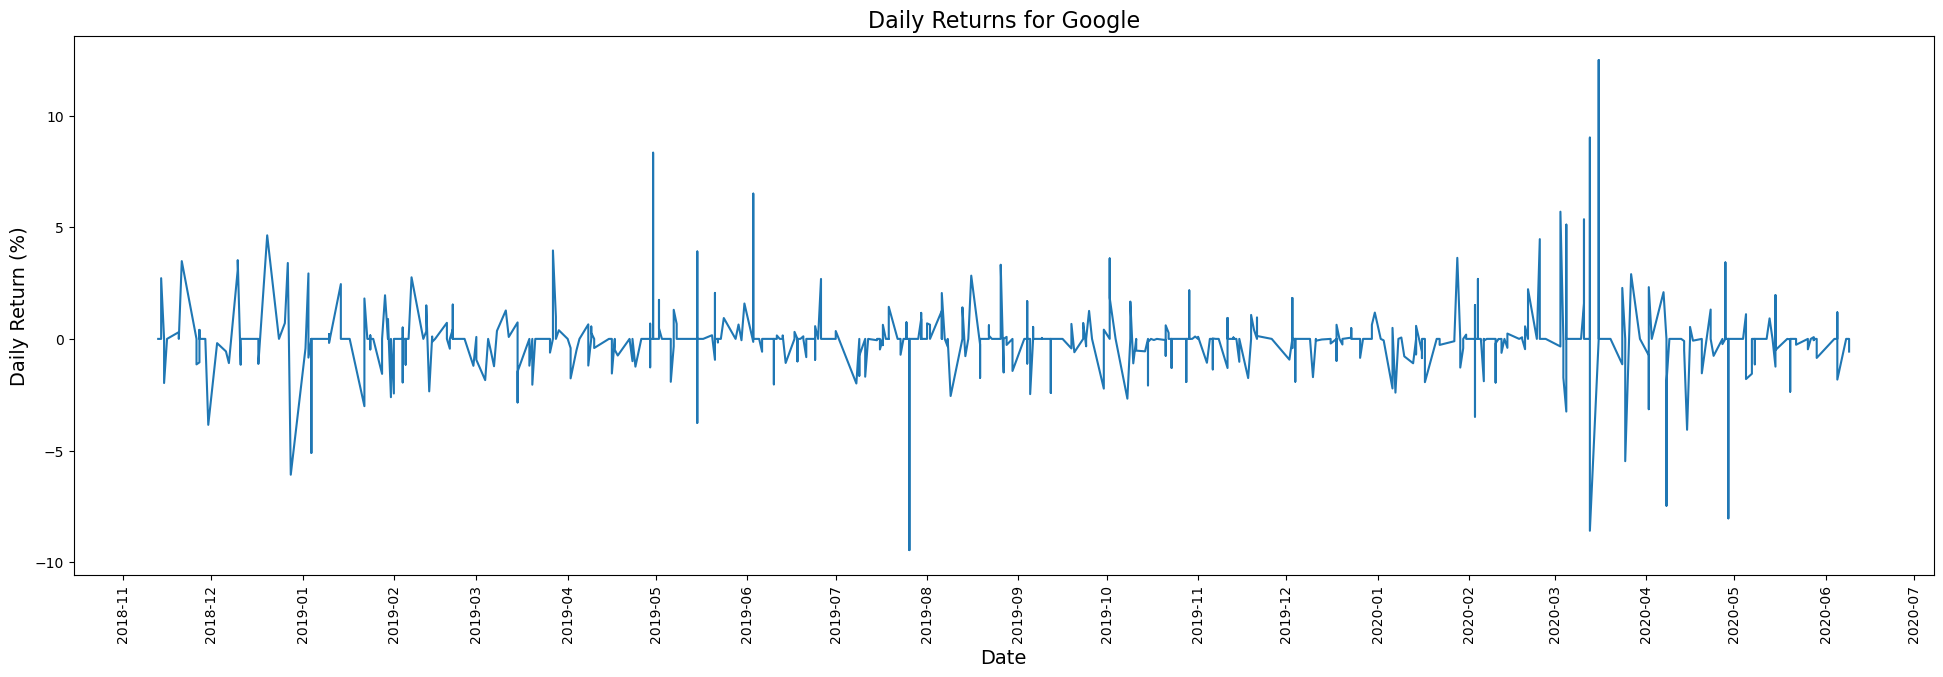

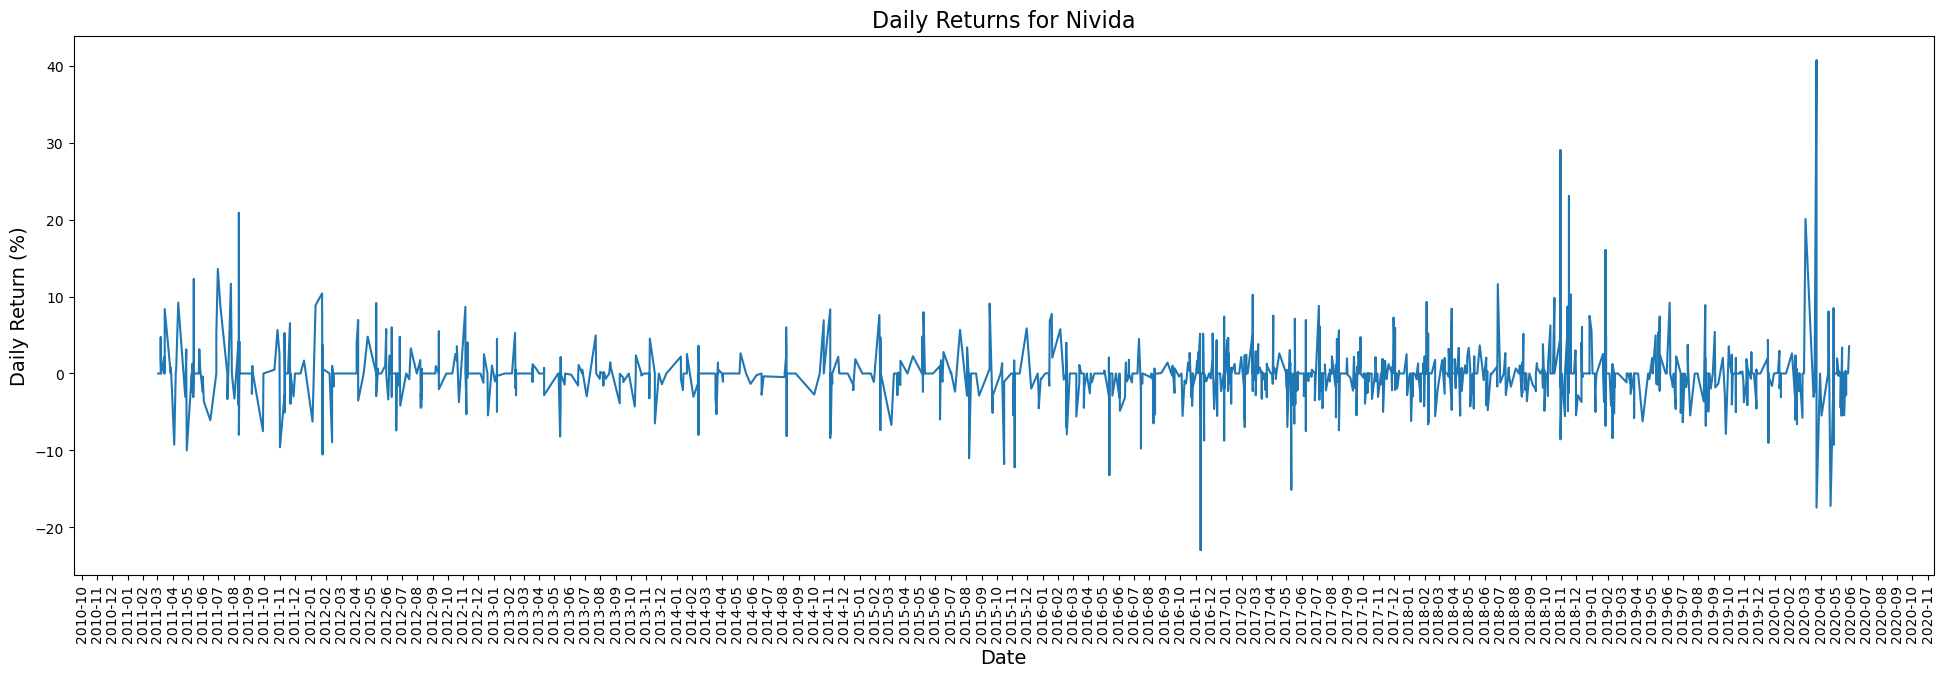

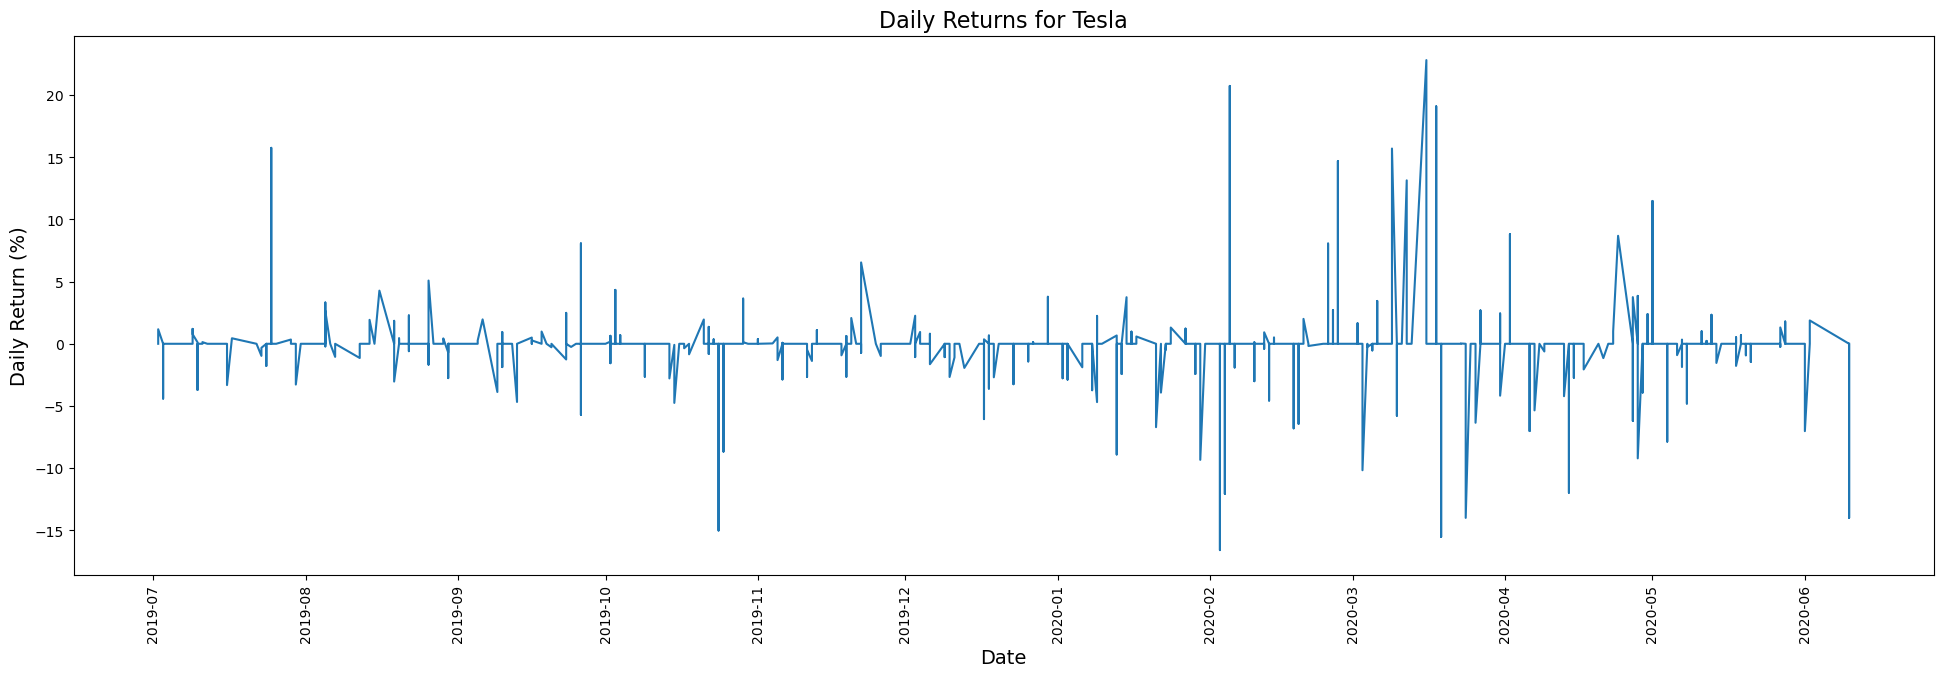

In [14]:
# using line plot to plot the return of each company
companies = merged_df['stock'].unique() 
companies_names = ['Apple','Amazon','Google','Nivida','Tesla']   # the full name of each stocks

for i,com in enumerate(companies):
    subset = merged_df[merged_df['stock'] == com].sort_values(by='date') 
    
    plt.figure(figsize=(24,7))
    
    plt.plot(subset['date'], subset['daily_return'])
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())       # major values(common dates) on the x-axis ticks 
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    
    plt.title('Daily Returns for ' + companies_names[i], fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Daily Return (%)', fontsize=14)

    plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees
    
    plt.show()

## Correlation Analysis

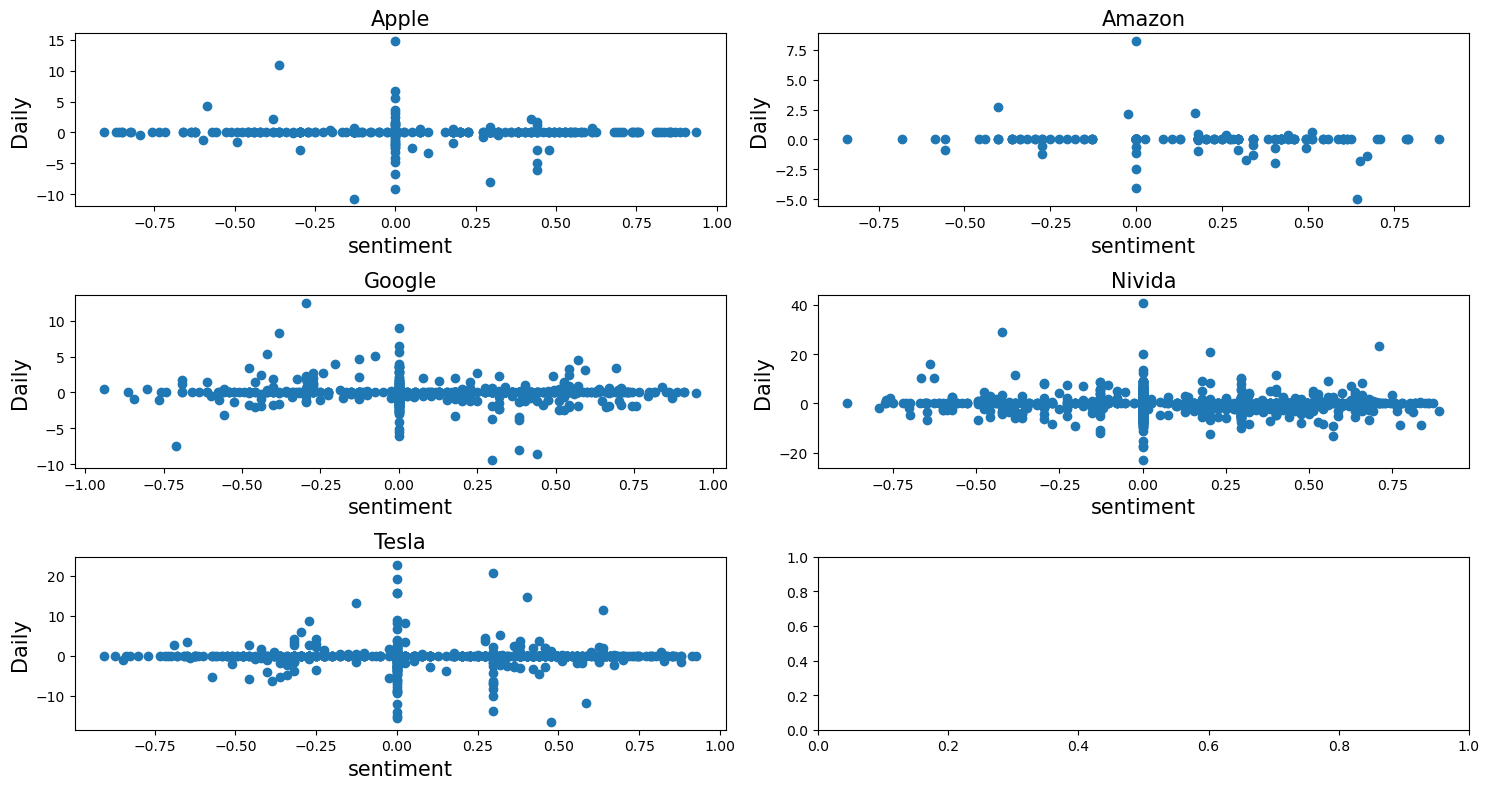

In [15]:
# using scatter plot to get the correlation between sentiment vs daily return
companies = merged_df['stock'].unique()
companies_names = ['Apple','Amazon','Google','Nivida','Tesla']   # the full name of each stocks

fig, axs = plt.subplots(3,2,figsize=(15,8))
axs = axs.flatten()
  
for i,com in enumerate(companies):
    subset = merged_df[merged_df['stock'] == com].sort_values(by='date')
    subset_without_NAN = subset.dropna()    # delete rows with NaN values
    
    axs[i].scatter(subset_without_NAN['sentiment'],subset_without_NAN['daily_return'])
      
    axs[i].set_title(companies_names[i],fontsize=15)    
    axs[i].set_xlabel('sentiment',fontsize=15)
    axs[i].set_ylabel('Daily',fontsize=15)


plt.tight_layout()
plt.show()

In [17]:
# using spearmanr Correlation to get the correlation measure
companies = merged_df['stock'].unique()
companies_names = ['Apple','Amazon','Google','Nivida','Tesla']
merged_df_without_NAN = merged_df.dropna()

for i,com in enumerate(companies):
    subset = merged_df_without_NAN[merged_df['stock'] == com].sort_values(by='date')
    spearmanr_corr,_ = spearmanr(subset['sentiment'],subset['daily_return'].dropna())
    
    print(f"{companies_names[i]} correlation measure {round(spearmanr_corr,2)}")

Apple correlation measure -0.01
Amazon correlation measure -0.07
Google correlation measure -0.02
Nivida correlation measure -0.05
Tesla correlation measure 0.01


In [19]:
# To check if previous days have effect
companies = merged_df['stock'].unique()

for i,com in enumerate(companies):
    merged_df_without_NAN['lagged_sentiment'] = merged_df_without_NAN[merged_df_without_NAN['stock'] == com]['sentiment'].shift(1)
    subset = merged_df_without_NAN[merged_df_without_NAN['stock'] == com].sort_values(by='date')
    subset_without_NAN = subset.dropna()
    lagged_corr, _ = pearsonr(subset_without_NAN['daily_return'], subset_without_NAN['lagged_sentiment'])
    
    print(f"{companies_names[i]} correlation measure {round(lagged_corr,2)}")

Apple correlation measure 0.02
Amazon correlation measure -0.09
Google correlation measure 0.01
Nivida correlation measure 0.01
Tesla correlation measure -0.04


In [21]:
# to see why the headline sentiments doesn't show effect on the return score
companies = merged_df['stock'].unique()
companies_names = ['Apple','Amazon','Google','Nivida','Tesla']

for i,com in enumerate(companies):
    print(companies_names[i])
    subset = merged_df[merged_df['stock'] == com]
    print(subset['sentiment_category'].value_counts())
    print('\n')

Apple
sentiment_category
Neutral          272
Negative          73
Positive          42
Very Negative     24
Name: count, dtype: int64


Amazon
sentiment_category
Neutral          152
Negative          30
Positive          23
Very Negative      5
Name: count, dtype: int64


Google
sentiment_category
Neutral          529
Negative         117
Positive         104
Very Negative     33
Name: count, dtype: int64


Nivida
sentiment_category
Neutral          1241
Negative          227
Positive          157
Very Negative      50
Name: count, dtype: int64


Tesla
sentiment_category
Neutral          860
Negative         174
Positive         132
Very Negative     41
Name: count, dtype: int64




> It can be seen that there is a lot of netural headline this the distribution of sentiments is skew toward netural sentiments.

In [22]:
# check correlation without neutral headlines
sentiments = ['Positive','Negative','Very Negative']
without_netural = merged_df[merged_df['sentiment_category'].isin(sentiments)]

# using Pearson Correlation to get the correlation measure
companies = without_netural['stock'].unique()
companies_names = ['Apple','Amazon','Google','Nivida','Tesla']
merged_df_without_NAN = without_netural.dropna()

for i,com in enumerate(companies):
    subset = merged_df_without_NAN[without_netural['stock'] == com].sort_values(by='date')
    spearmanr_corr,_ = spearmanr(subset['sentiment'],subset['daily_return'].dropna())
    
    print(f"{companies_names[i]} correlation measure {round(spearmanr_corr,2)}")

Apple correlation measure 0.05
Amazon correlation measure -0.1
Google correlation measure 0.0
Nivida correlation measure 0.05
Tesla correlation measure 0.06


> This indicated that whether netural is considered or not there is no correlation between sentiments and daily returns.